In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import skew


In [44]:
file_path = "/content/drive/MyDrive/Warehouse_and_Retail_Sales.csv"
df = pd.read_csv(file_path)
print("Shape:", df.shape)
df.head()


Shape: (307645, 9)


,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [45]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [47]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]


,0
SUPPLIER,167
RETAIL SALES,3
ITEM TYPE,1


In [48]:
#For SUPPLIER (categorical) – impute with 'Unknown'
df['SUPPLIER'].fillna('Unknown', inplace=True)

# For RETAIL SALES (numerical) – impute with median
df['RETAIL SALES'].fillna(df['RETAIL SALES'].median(), inplace=True)

# For ITEM TYPE (categorical) – impute with mode
df['ITEM TYPE'].fillna(df['ITEM TYPE'].mode()[0], inplace=True)

# Recheck to confirm
df.isnull().sum()


/tmp/ipython-input-48-163855001.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SUPPLIER'].fillna('Unknown', inplace=True)
/tmp/ipython-input-48-163855001.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
YEAR,0
MONTH,0
SUPPLIER,0
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL SALES,0
RETAIL TRANSFERS,0
WAREHOUSE SALES,0


In [49]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
YEAR,307645.0,NaN,NaN,NaN,2018.438525,1.083061,2017.0,2017.0,2019.0,2019.0,2020.0
MONTH,307645.0,NaN,NaN,NaN,6.423862,3.461812,1.0,3.0,7.0,9.0,12.0
SUPPLIER,307645,397,REPUBLIC NATIONAL DISTRIBUTING CO,20995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ITEM CODE,307645,34056,100749,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ITEM DESCRIPTION,307645,34822,BURGANS ALBARINO - 750ML,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ITEM TYPE,307645,8,WINE,187641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RETAIL SALES,307645.0,NaN,NaN,NaN,7.024006,30.986094,-6.49,0.0,0.32,3.26,2739.0
RETAIL TRANSFERS,307645.0,NaN,NaN,NaN,6.936465,30.237195,-38.49,0.0,0.0,3.0,1990.83
WAREHOUSE SALES,307645.0,NaN,NaN,NaN,25.294597,249.916798,-7800.0,0.0,1.0,5.0,18317.0


In [50]:
df.nunique().sort_values(ascending=False)


,0
ITEM DESCRIPTION,34822
ITEM CODE,34056
RETAIL SALES,10674
WAREHOUSE SALES,4895
RETAIL TRANSFERS,2504
SUPPLIER,397
MONTH,12
ITEM TYPE,8
YEAR,4


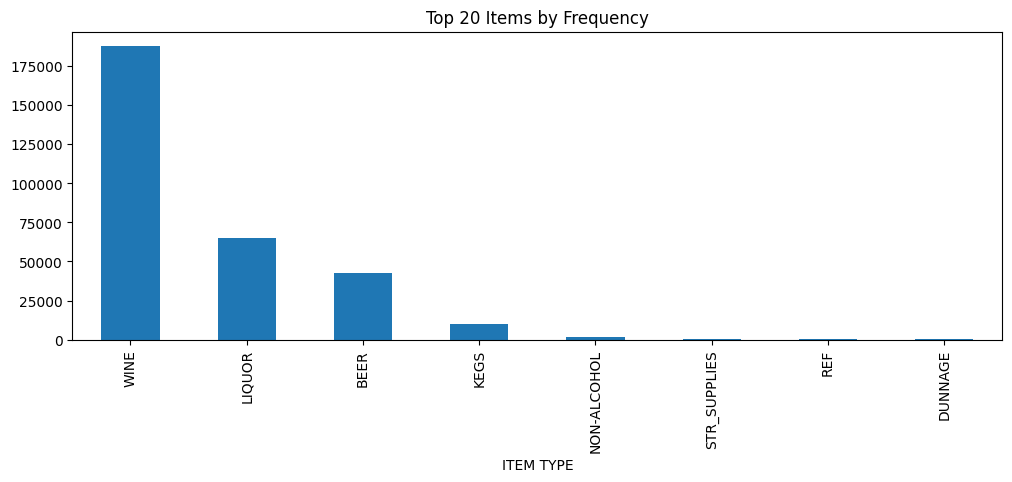

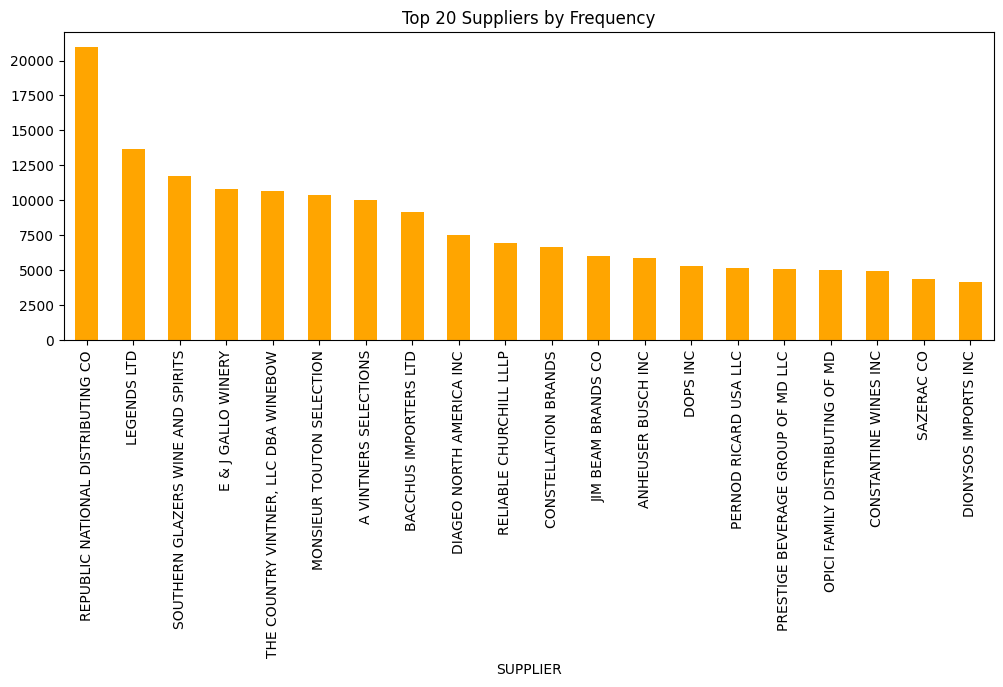

In [51]:
plt.figure(figsize=(12, 4))
df['ITEM TYPE'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Items by Frequency")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 4))
df['SUPPLIER'].value_counts().head(20).plot(kind='bar', color='orange')
plt.title("Top 20 Suppliers by Frequency")
plt.xticks(rotation=90)
plt.show()

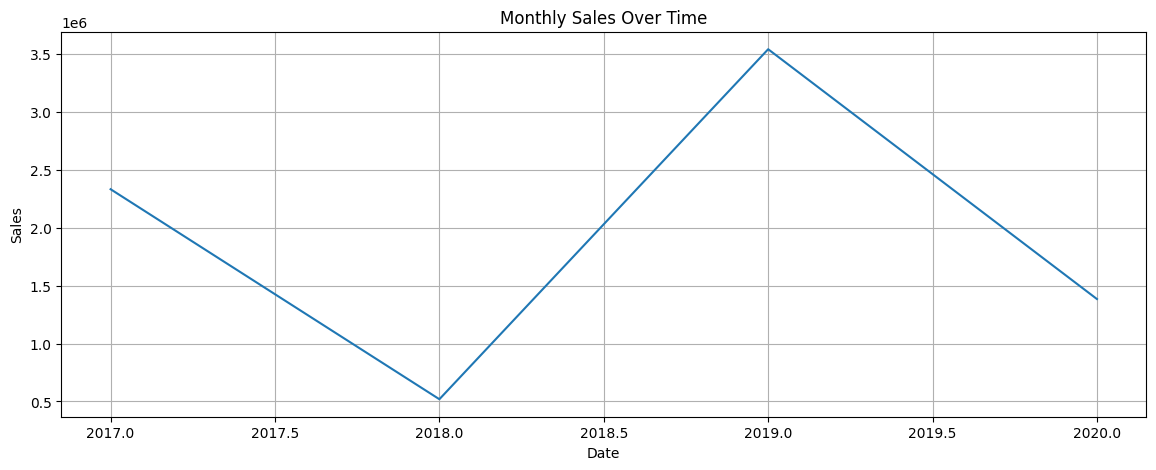

In [52]:
monthly_sales = df.groupby('YEAR')['WAREHOUSE SALES'].sum()
monthly_sales.plot(figsize=(14, 5), title="Monthly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid()
plt.show()

In [53]:
# Check skewness to decide if transformation is needed
skew_values = df.select_dtypes(include=['float64', 'int64']).skew().sort_values(ascending=False)
print("Skewness:\n", skew_values)

Skewness:
 WAREHOUSE SALES     28.807663
RETAIL SALES        19.421882
RETAIL TRANSFERS    17.384265
MONTH               -0.180377
YEAR                -0.225462
dtype: float64


In [58]:
# Replace negative values with NaN before applying log1p
for col in ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']:
    df.loc[df[col] < 0, col] = np.nan  # force invalid log targets to NaN
    df[col + '_LOG'] = np.log1p(df[col])


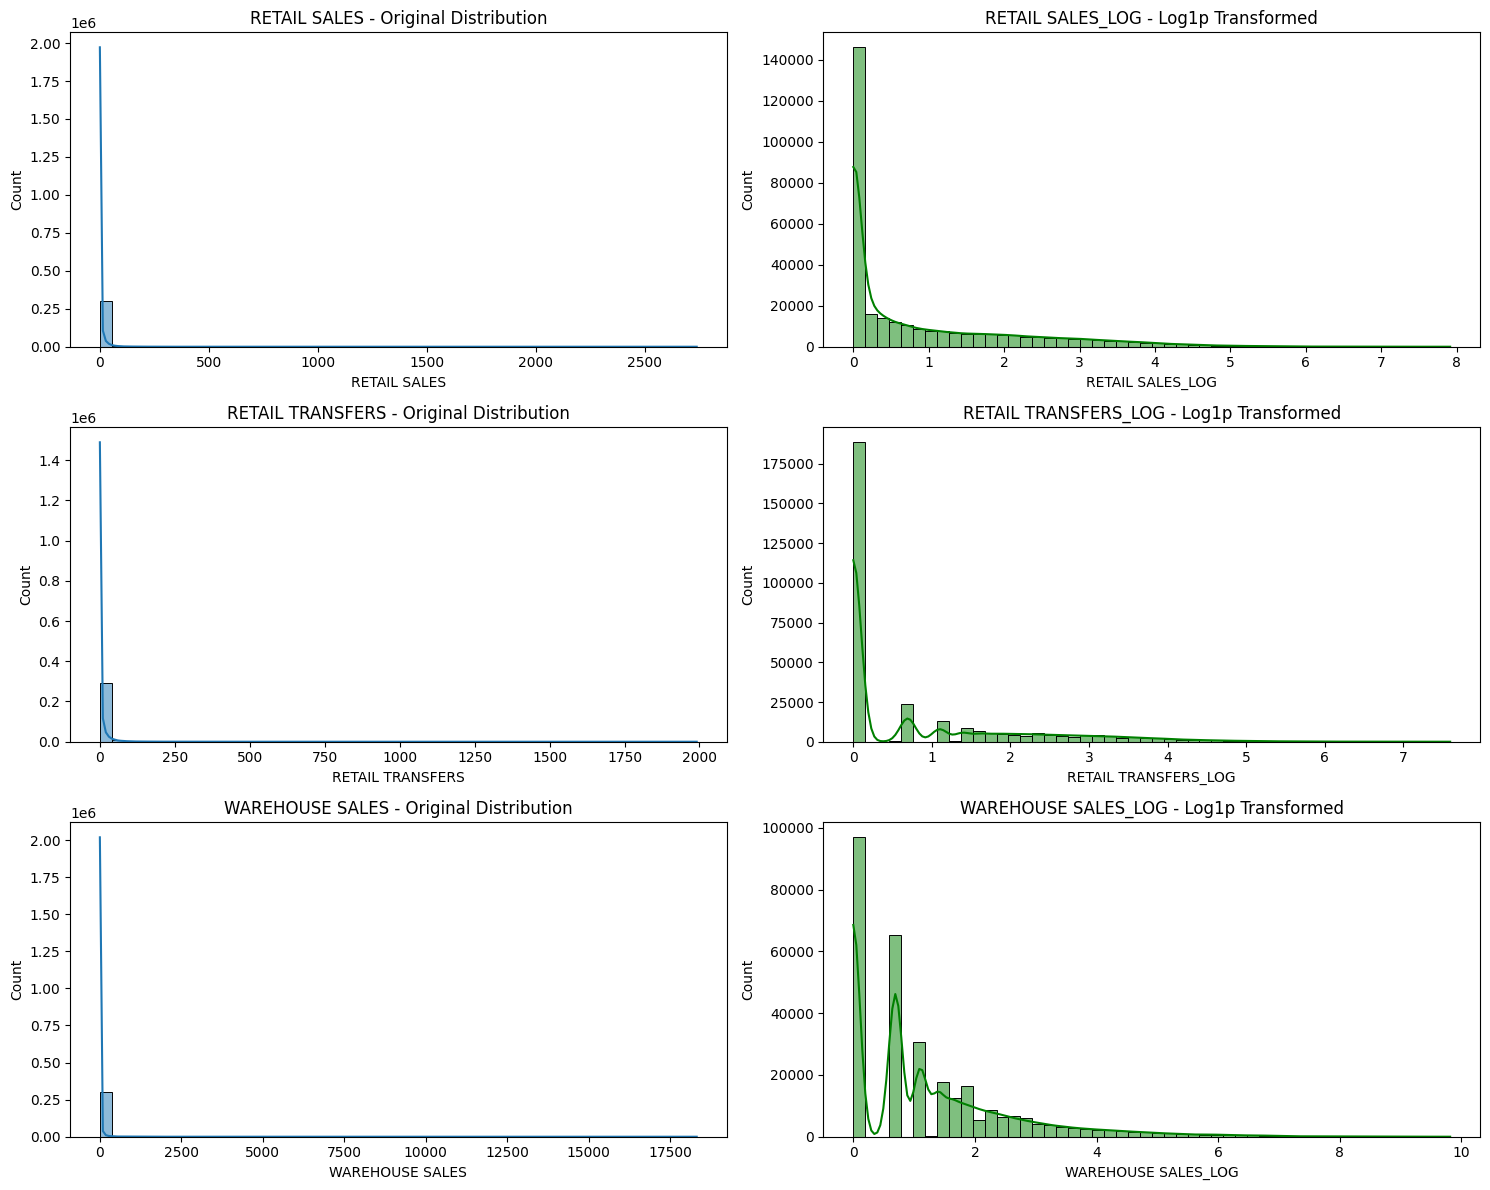

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']
log_cols = ['RETAIL SALES_LOG', 'RETAIL TRANSFERS_LOG', 'WAREHOUSE SALES_LOG']

fig, axes = plt.subplots(3, 2, figsize=(15, 12))

for i, (orig, logg) in enumerate(zip(cols, log_cols)):
    sns.histplot(df[orig], bins=50, kde=True, ax=axes[i][0])
    axes[i][0].set_title(f'{orig} - Original Distribution')

    sns.histplot(df[logg], bins=50, kde=True, ax=axes[i][1], color='green')
    axes[i][1].set_title(f'{logg} - Log1p Transformed')

plt.tight_layout()
plt.show()


In [60]:
# Step 1: Check how many outliers exist in each log-transformed column using IQR
for col in ['RETAIL_SALES_LOG', 'RETAIL_TRANSFERS_LOG', 'WAREHOUSE_SALES_LOG']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({(len(outliers)/len(df))*100:.2f}%)")


RETAIL_SALES_LOG: 13341 outliers (4.34%)
RETAIL_TRANSFERS_LOG: 16866 outliers (5.48%)
WAREHOUSE_SALES_LOG: 11927 outliers (3.88%)


In [61]:
# Remove IQR-based outliers across all log-transformed columns
for col in ['RETAIL_SALES_LOG', 'RETAIL_TRANSFERS_LOG', 'WAREHOUSE_SALES_LOG']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Confirm shape after cleaning
print("Final shape after outlier removal:", df.shape)


Final shape after outlier removal: (265689, 15)


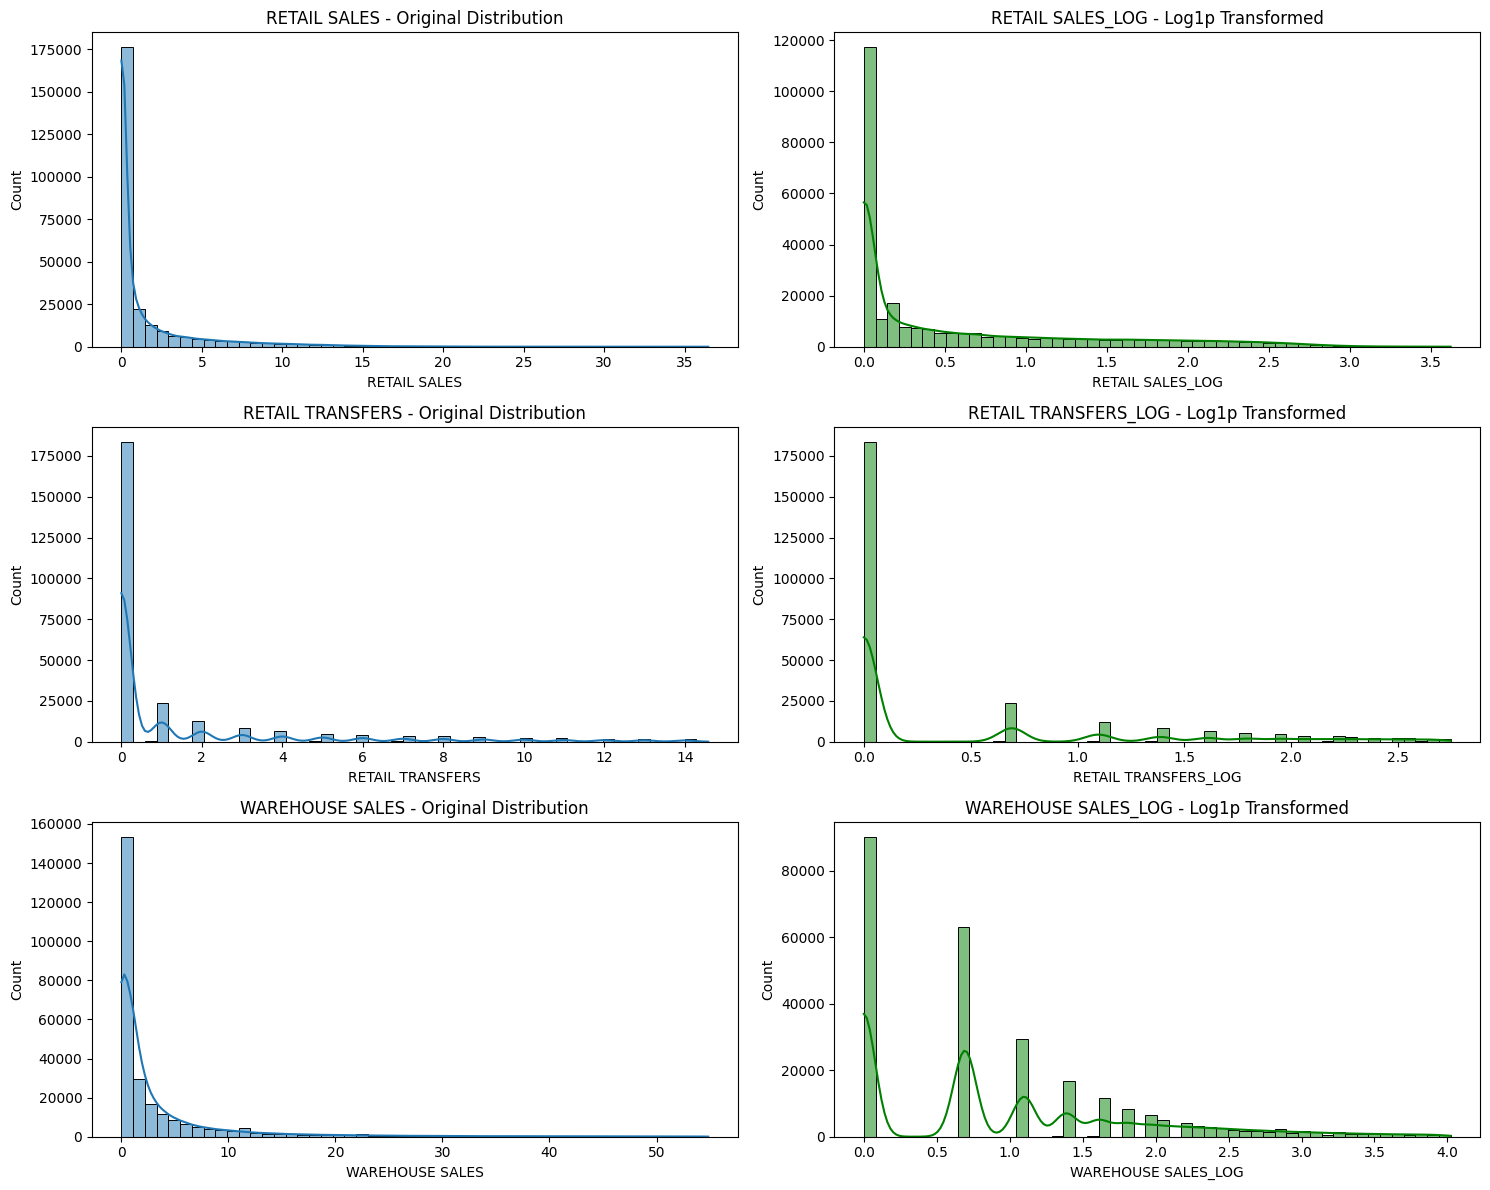

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']
log_cols = ['RETAIL SALES_LOG', 'RETAIL TRANSFERS_LOG', 'WAREHOUSE SALES_LOG']

fig, axes = plt.subplots(3, 2, figsize=(15, 12))

for i, (orig, logg) in enumerate(zip(cols, log_cols)):
    sns.histplot(df[orig], bins=50, kde=True, ax=axes[i][0])
    axes[i][0].set_title(f'{orig} - Original Distribution')

    sns.histplot(df[logg], bins=50, kde=True, ax=axes[i][1], color='green')
    axes[i][1].set_title(f'{logg} - Log1p Transformed')

plt.tight_layout()
plt.show()


In [64]:
print(df.columns.tolist())
df.drop(columns=['RETAIL SALES_LOG', 'WAREHOUSE SALES_LOG', 'RETAIL TRANSFERS_LOG'], inplace=True)


['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION', 'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES', 'RETAIL_SALES_LOG', 'WAREHOUSE_SALES_LOG', 'RETAIL_TRANSFERS_LOG', 'RETAIL SALES_LOG', 'RETAIL TRANSFERS_LOG', 'WAREHOUSE SALES_LOG']


In [65]:
print(df.columns.tolist())

['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION', 'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES', 'RETAIL_SALES_LOG', 'WAREHOUSE_SALES_LOG', 'RETAIL_TRANSFERS_LOG']


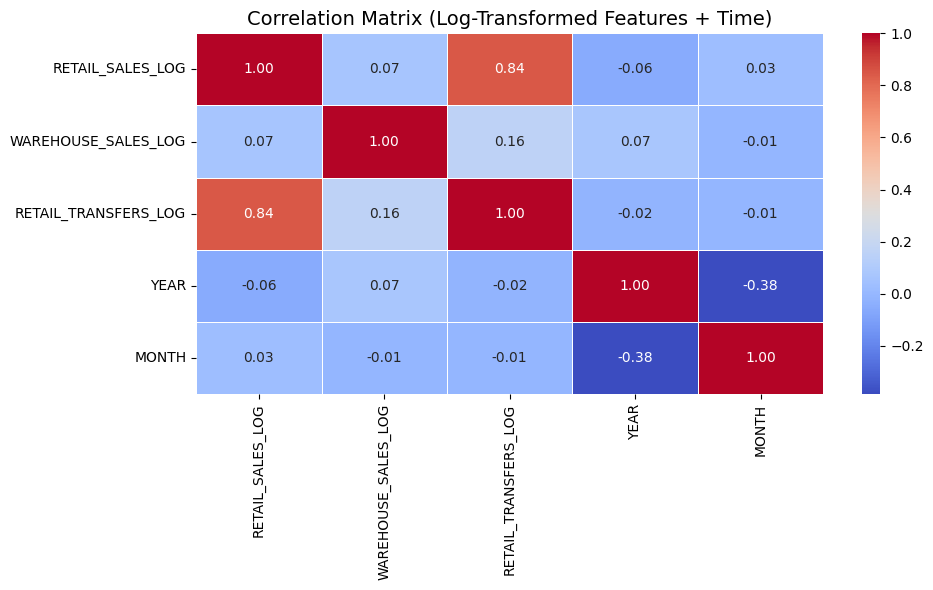

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

log_columns = ['RETAIL_SALES_LOG', 'WAREHOUSE_SALES_LOG', 'RETAIL_TRANSFERS_LOG', 'YEAR', 'MONTH']
log_corr_df = df[log_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(log_corr_df, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (Log-Transformed Features + Time)", fontsize=14)
plt.tight_layout()
plt.show()


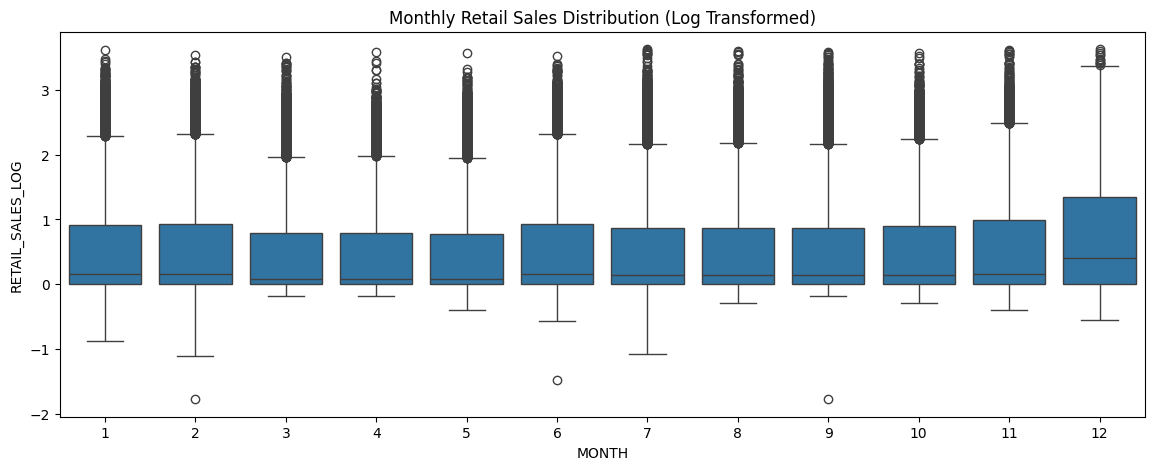

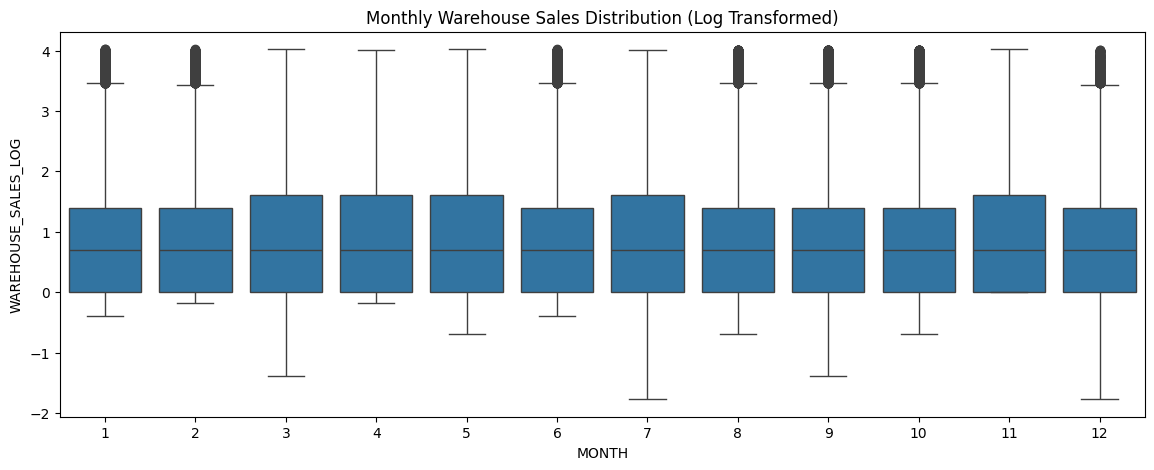

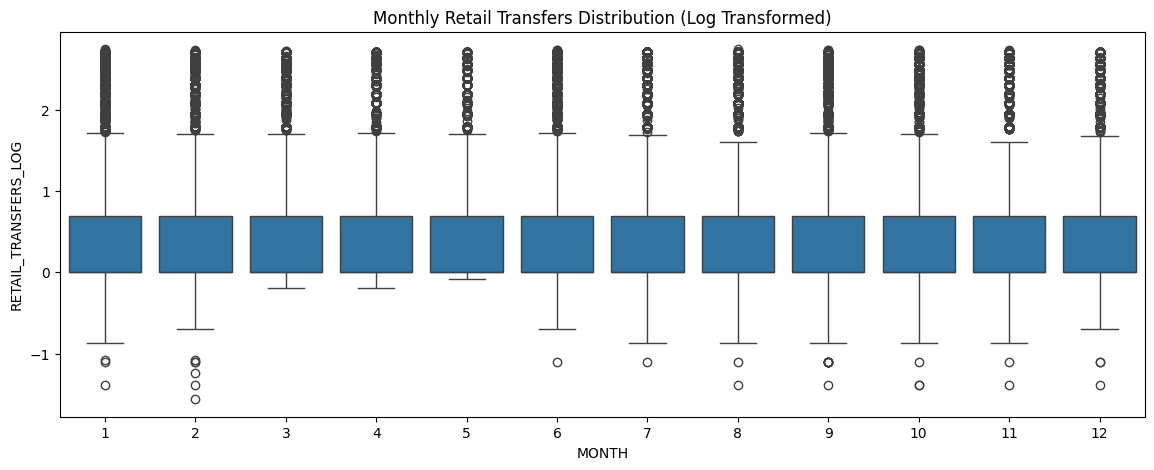

In [67]:
plt.figure(figsize=(14, 5))
sns.boxplot(x='MONTH', y='RETAIL_SALES_LOG', data=df)
plt.title('Monthly Retail Sales Distribution (Log Transformed)')
plt.show()
plt.figure(figsize=(14, 5))
sns.boxplot(x='MONTH', y='WAREHOUSE_SALES_LOG', data=df)
plt.title('Monthly Warehouse Sales Distribution (Log Transformed)')
plt.show()
plt.figure(figsize=(14, 5))
sns.boxplot(x='MONTH', y='RETAIL_TRANSFERS_LOG', data=df)
plt.title('Monthly Retail Transfers Distribution (Log Transformed)')
plt.show()


In [68]:
df.groupby('MONTH')[['RETAIL_SALES_LOG', 'WAREHOUSE_SALES_LOG', 'RETAIL_TRANSFERS_LOG']].describe()


RETAIL_SALES_LOG                                                         \
                 count      mean       std       min  25%       50%       75%   
MONTH                                                                           
1              33081.0  0.552785  0.756840 -0.867501  0.0  0.157004  0.916291   
2              22198.0  0.562263  0.759402 -1.771957  0.0  0.157004  0.924259   
3              20427.0  0.502453  0.736624 -0.186330  0.0  0.076961  0.783902   
4              11026.0  0.501174  0.723601 -0.186330  0.0  0.076961  0.792993   
5              11187.0  0.492261  0.730988 -0.400478  0.0  0.076961  0.779325   
6              22507.0  0.562984  0.775690 -1.469676  0.0  0.157004  0.924259   
7              31306.0  0.534988  0.757218 -1.078810  0.0  0.148420  0.867100   
8              22497.0  0.541407  0.756363 -0.287682  0.0  0.148420  0.871293   
9              32239.0  0.539563  0.766952 -1.771957  0.0  0.148420  0.867100   
10             23065.0  0.540036  0.754445 -0.287682  0.0  0.148420  0.896088   
11             23591.0  0.585711  0.787820 -0.400478  0.0  0.157004  0.993252   
12             12565.0  0.746937  0.858565 -0.544727  0.0  0.398776  1.345472   

                WAREHOUSE_SALES_LOG            ...                      \
            max               count      mean  ...       75%       max   
MONTH                                          ...                       
1      3.608753             33081.0  0.953014  ...  1.386294  4.022311   
2      3.536602             22198.0  0.914822  ...  1.386294  4.020877   
3      3.497416             20427.0  0.992536  ...  1.609438  4.022311   
4      3.574030             11026.0  1.001719  ...  1.609438  4.007333   
5      3.559055             11187.0  1.041803  ...  1.609438  4.020877   
6      3.523120             22507.0  0.942796  ...  1.386294  4.020877   
7      3.620868             31306.0  0.960913  ...  1.609438  4.016383   
8      3.599502             22497.0  0.942145  ...  1.386294  4.007333   
9      3.585739             32239.0  0.959930  ...  1.386294  4.016383   
10     3.562466             23065.0  0.955263  ...  1.386294  4.007333   
11     3.610918             23591.0  0.956597  ...  1.609438  4.020877   
12     3.623541             12565.0  0.828085  ...  1.386294  4.007333   

      RETAIL_TRANSFERS_LOG                                                    \
                     count      mean       std       min  25%  50%       75%   
MONTH                                                                          
1                  33081.0  0.476929  0.773849 -1.386294  0.0  0.0  0.693147   
2                  22198.0  0.447972  0.765068 -1.560648  0.0  0.0  0.693147   
3                  20427.0  0.431997  0.751620 -0.186330  0.0  0.0  0.693147   
4                  11026.0  0.433983  0.751378 -0.186330  0.0  0.0  0.693147   
5                  11187.0  0.408224  0.728346 -0.083382  0.0  0.0  0.693147   
6                  22507.0  0.446381  0.763138 -1.108663  0.0  0.0  0.693147   
7                  31306.0  0.448460  0.764268 -1.108663  0.0  0.0  0.693147   
8                  22497.0  0.449694  0.761525 -1.386294  0.0  0.0  0.693147   
9                  32239.0  0.441271  0.763996 -1.386294  0.0  0.0  0.693147   
10                 23065.0  0.458475  0.779629 -1.386294  0.0  0.0  0.693147   
11                 23591.0  0.431225  0.763815 -1.386294  0.0  0.0  0.693147   
12                 12565.0  0.420784  0.759533 -1.386294  0.0  0.0  0.693147   

                 
            max  
MONTH            
1      2.745988  
2      2.740195  
3      2.729812  
4      2.708050  
5      2.708050  
6      2.741485  
7      2.708050  
8      2.745988  
9      2.740840  
10     2.740840  
11     2.735665  
12     2.708050  

[12 rows x 24 columns]

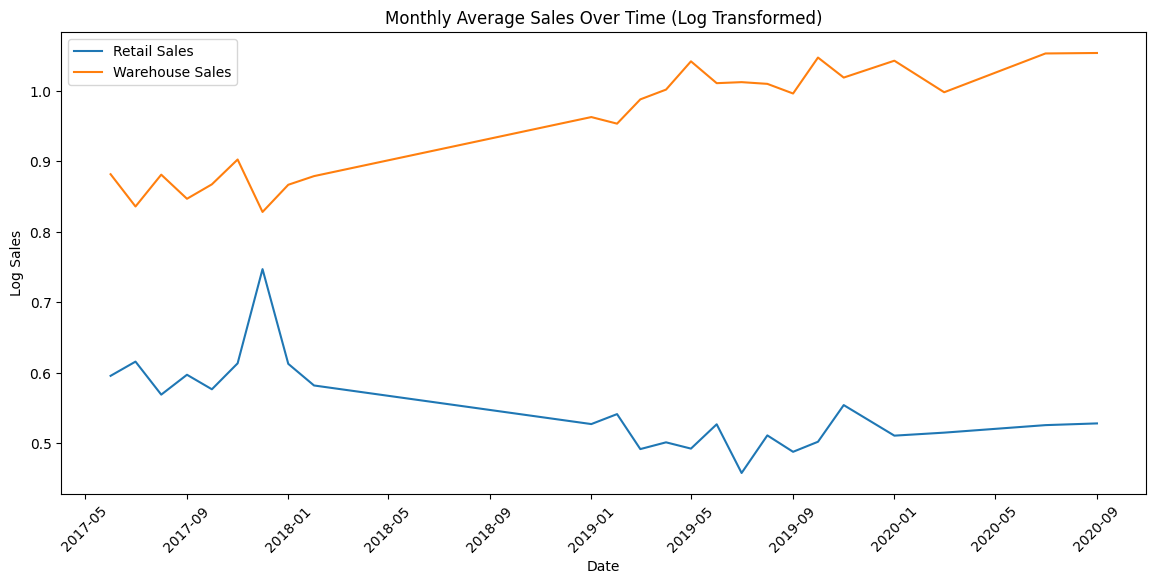

In [69]:
monthly_avg = df.groupby(['YEAR', 'MONTH'])[['RETAIL_SALES_LOG', 'WAREHOUSE_SALES_LOG']].mean().reset_index()
monthly_avg['DATE'] = pd.to_datetime(monthly_avg['YEAR'].astype(str) + '-' + monthly_avg['MONTH'].astype(str))

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_avg, x='DATE', y='RETAIL_SALES_LOG', label='Retail Sales')
sns.lineplot(data=monthly_avg, x='DATE', y='WAREHOUSE_SALES_LOG', label='Warehouse Sales')
plt.title('Monthly Average Sales Over Time (Log Transformed)')
plt.ylabel('Log Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.show()


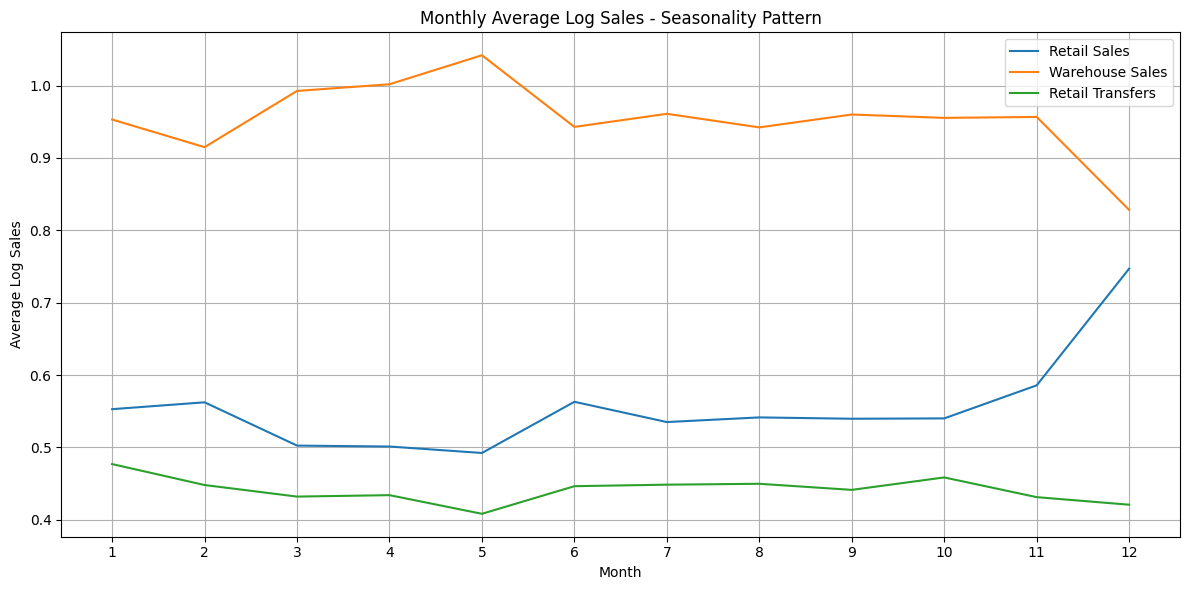

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly average sales (log-transformed)
monthly_avg = df.groupby('MONTH')[['RETAIL_SALES_LOG', 'WAREHOUSE_SALES_LOG', 'RETAIL_TRANSFERS_LOG']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='MONTH', y='RETAIL_SALES_LOG', label='Retail Sales')
sns.lineplot(data=monthly_avg, x='MONTH', y='WAREHOUSE_SALES_LOG', label='Warehouse Sales')
sns.lineplot(data=monthly_avg, x='MONTH', y='RETAIL_TRANSFERS_LOG', label='Retail Transfers')
plt.title('Monthly Average Log Sales - Seasonality Pattern')
plt.xlabel('Month')
plt.ylabel('Average Log Sales')
plt.xticks(ticks=range(1, 13))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [71]:
# Drop the original skewed columns since we've already used their log1p versions
df = df.drop(['RETAIL SALES', 'WAREHOUSE SALES', 'RETAIL TRANSFERS'], axis=1)


In [72]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION', 'ITEM TYPE']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for later inverse transform


In [73]:
df

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL_SALES_LOG,WAREHOUSE_SALES_LOG,RETAIL_TRANSFERS_LOG
0,2020,1,272,3,4387,6,0.000000,1.098612,0.000000
1,2020,1,263,8,21707,6,0.000000,1.609438,0.693147
2,2020,1,270,11,26659,0,0.000000,0.693147,0.000000
3,2020,1,186,13,27375,6,0.000000,0.693147,0.000000
4,2020,1,91,20,27160,6,0.598837,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
307635,2020,9,272,33178,24023,0,0.223144,1.791759,1.098612
307638,2020,9,191,33183,12170,0,0.000000,1.609438,0.000000
307640,2020,9,191,33186,11635,0,0.000000,1.791759,0.000000
307642,2020,9,73,33190,11091,0,1.178655,0.000000,0.000000


In [75]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ['RETAIL_SALES_LOG', 'WAREHOUSE_SALES_LOG', 'RETAIL_TRANSFERS_LOG']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [76]:
df

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL_SALES_LOG,WAREHOUSE_SALES_LOG,RETAIL_TRANSFERS_LOG
0,2020,1,272,3,4387,6,0.328414,0.495415,0.362382
1,2020,1,263,8,21707,6,0.328414,0.583576,0.523331
2,2020,1,270,11,26659,0,0.328414,0.425438,0.362382
3,2020,1,186,13,27375,6,0.328414,0.425438,0.362382
4,2020,1,91,20,27160,6,0.439402,0.305812,0.362382
...,...,...,...,...,...,...,...,...,...
307635,2020,9,272,33178,24023,0,0.369771,0.615042,0.617480
307638,2020,9,191,33183,12170,0,0.328414,0.583576,0.362382
307640,2020,9,191,33186,11635,0,0.328414,0.615042,0.362382
307642,2020,9,73,33190,11091,0,0.546866,0.305812,0.362382


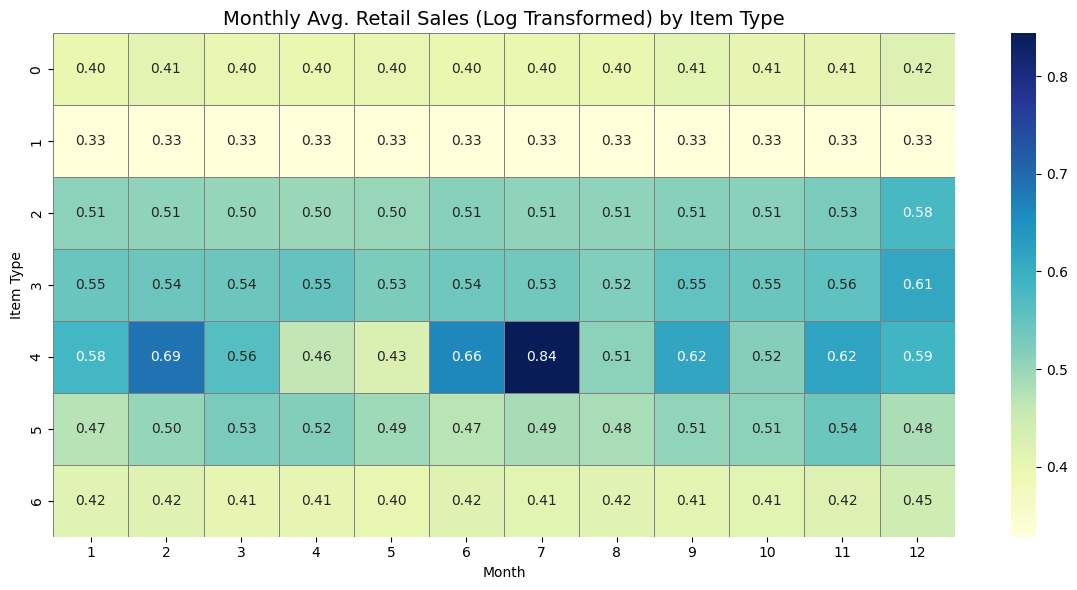

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by item type and month, take average of log-transformed retail sales
heatmap_data = df.groupby(['ITEM TYPE', 'MONTH'])['RETAIL_SALES_LOG'].mean().reset_index()

# Pivot the data for heatmap: rows = item type, columns = month
heatmap_pivot = heatmap_data.pivot(index='ITEM TYPE', columns='MONTH', values='RETAIL_SALES_LOG')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title('Monthly Avg. Retail Sales (Log Transformed) by Item Type', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Item Type')
plt.tight_layout()
plt.show()


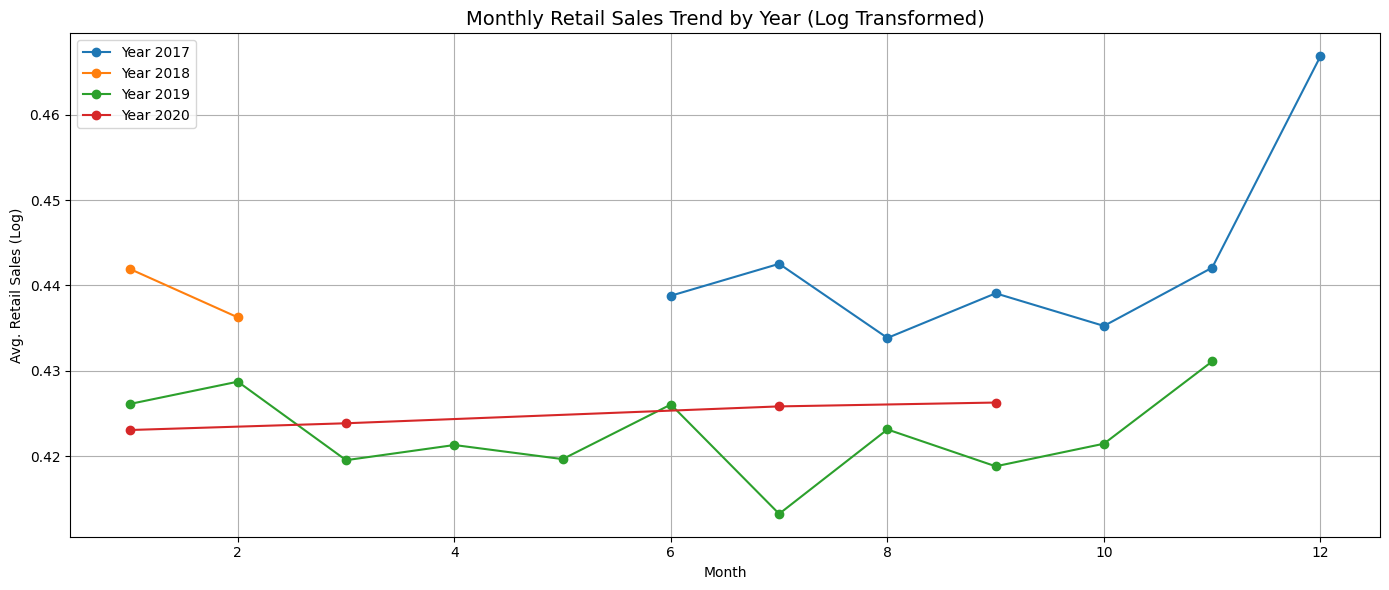

In [79]:
plt.figure(figsize=(14, 6))

# Group by year and month, take average of retail sales (log)
trend_data = df.groupby(['YEAR', 'MONTH'])['RETAIL_SALES_LOG'].mean().reset_index()

# Pivot so each year's monthly trend is a line
for year in sorted(df['YEAR'].unique()):
    monthly_avg = trend_data[trend_data['YEAR'] == year]
    plt.plot(monthly_avg['MONTH'], monthly_avg['RETAIL_SALES_LOG'], marker='o', label=f'Year {year}')

plt.title('Monthly Retail Sales Trend by Year (Log Transformed)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Avg. Retail Sales (Log)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


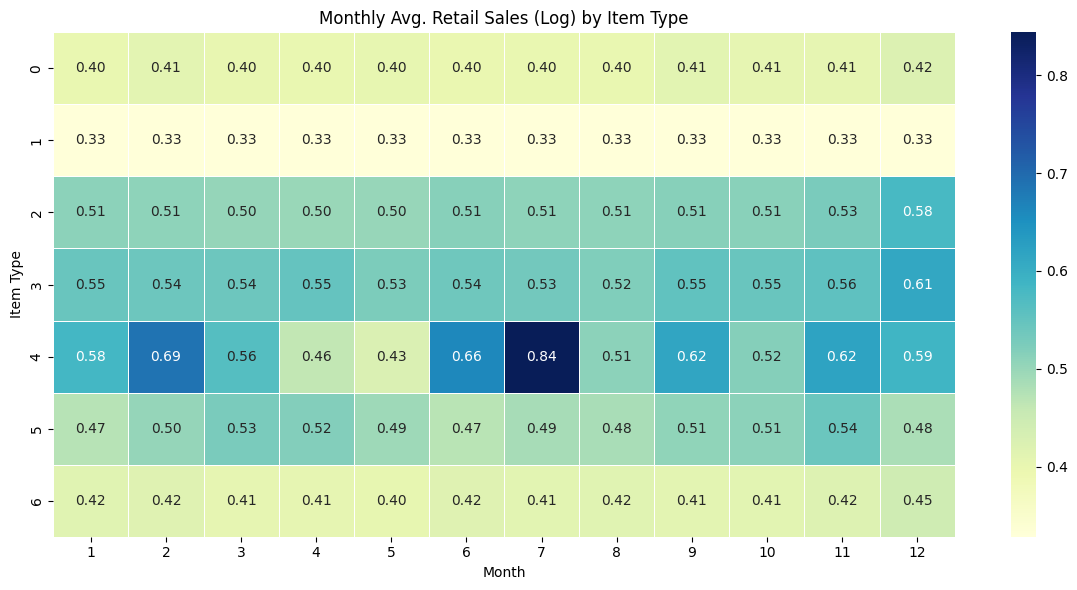

In [80]:
plt.figure(figsize=(12, 6))

# Group by item type and month
heatmap_data = df.groupby(['ITEM TYPE', 'MONTH'])['RETAIL_SALES_LOG'].mean().unstack()

# Create heatmap
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

plt.title('Monthly Avg. Retail Sales (Log) by Item Type')
plt.xlabel('Month')
plt.ylabel('Item Type')
plt.tight_layout()
plt.show()


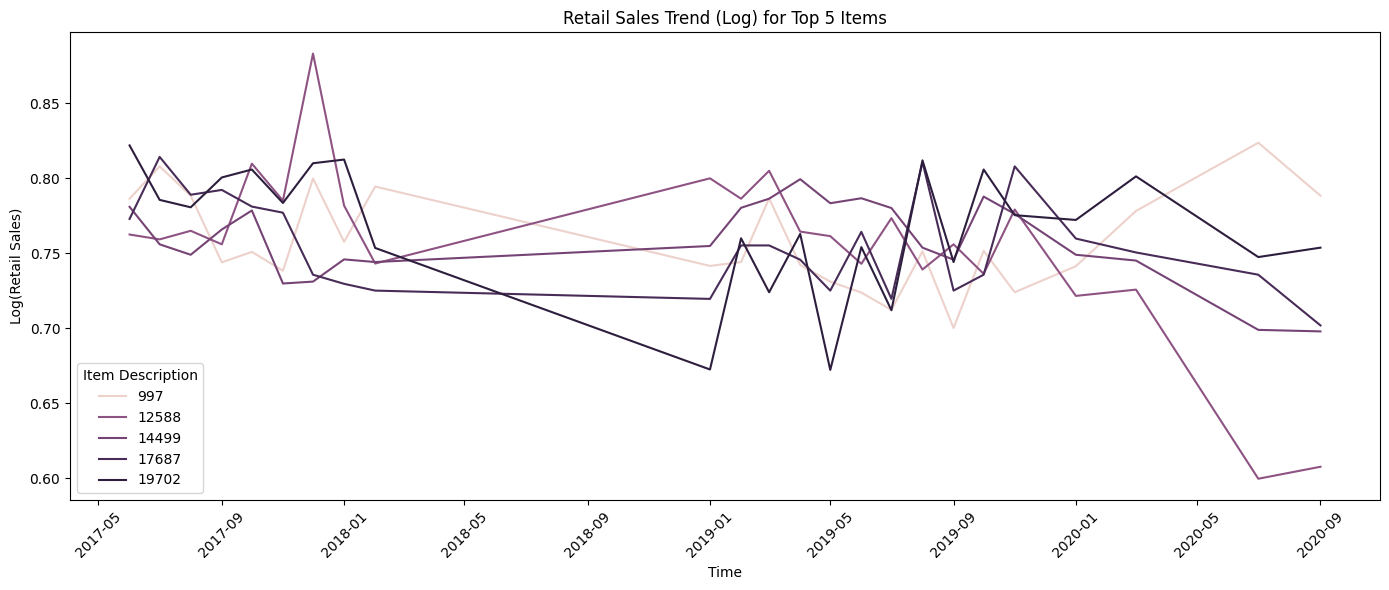

In [81]:
# Identify top 5 items by total retail sales
top_items = df.groupby('ITEM DESCRIPTION')['RETAIL_SALES_LOG'].sum().nlargest(5).index

# Filter for those items
top_df = df[df['ITEM DESCRIPTION'].isin(top_items)]

# Create a combined "Year-Month" column for proper time series plotting
top_df['YEAR_MONTH'] = pd.to_datetime(top_df['YEAR'].astype(str) + '-' + top_df['MONTH'].astype(str))

# Plot line chart
plt.figure(figsize=(14, 6))
sns.lineplot(data=top_df, x='YEAR_MONTH', y='RETAIL_SALES_LOG', hue='ITEM DESCRIPTION')
plt.title('Retail Sales Trend (Log) for Top 5 Items')
plt.xlabel('Time')
plt.ylabel('Log(Retail Sales)')
plt.xticks(rotation=45)
plt.legend(title='Item Description')
plt.tight_layout()
plt.show()


In [77]:
save_path = '/content/drive/MyDrive/retail_cleaned.csv'

df.to_csv(save_path, index=False)
print(f"Data saved to: {save_path}")

Data saved to: /content/drive/MyDrive/retail_cleaned.csv


**MILESTONE -2 **

In [82]:
# Lag features for each item based on RETAIL_SALES_LOG
df = df.sort_values(by=['ITEM CODE', 'YEAR', 'MONTH'])

for lag in [1, 2, 3]:
    df[f'RETAIL_SALES_LAG_{lag}'] = df.groupby('ITEM CODE')['RETAIL_SALES_LOG'].shift(lag)
    df[f'WAREHOUSE_SALES_LAG_{lag}'] = df.groupby('ITEM CODE')['WAREHOUSE_SALES_LOG'].shift(lag)
    df[f'RETAIL_TRANSFERS_LAG_{lag}'] = df.groupby('ITEM CODE')['RETAIL_TRANSFERS_LOG'].shift(lag)


In [83]:
df

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL_SALES_LOG,WAREHOUSE_SALES_LOG,RETAIL_TRANSFERS_LOG,RETAIL_SALES_LAG_1,WAREHOUSE_SALES_LAG_1,RETAIL_TRANSFERS_LAG_1,RETAIL_SALES_LAG_2,WAREHOUSE_SALES_LAG_2,RETAIL_TRANSFERS_LAG_2,RETAIL_SALES_LAG_3,WAREHOUSE_SALES_LAG_3,RETAIL_TRANSFERS_LAG_3
48471,2017,7,270,0,23936,2,0.357513,0.305812,0.362382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195005,2019,4,75,1,18367,6,0.328414,0.425438,0.362382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207739,2019,5,75,1,18367,6,0.328414,0.425438,0.362382,0.328414,0.425438,0.362382,NaN,NaN,NaN,NaN,NaN,NaN
270378,2019,10,75,1,18367,6,0.328414,0.425438,0.362382,0.328414,0.425438,0.362382,0.328414,0.425438,0.362382,NaN,NaN,NaN
283473,2019,11,75,1,18367,6,0.328414,0.425438,0.362382,0.328414,0.425438,0.362382,0.328414,0.425438,0.362382,0.328414,0.425438,0.362382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34717,2020,3,43,33191,26789,1,0.328414,0.813976,0.362382,0.328414,0.980966,0.362382,0.328414,0.954936,0.362382,0.328414,0.958904,0.362382
75097,2017,8,43,33192,26778,0,0.853521,0.892805,0.523331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195003,2019,3,43,33192,26841,0,0.328414,0.615042,0.362382,0.853521,0.892805,0.523331,NaN,NaN,NaN,NaN,NaN,NaN
257950,2019,8,43,33192,26841,0,0.560601,0.305812,0.362382,0.328414,0.615042,0.362382,0.853521,0.892805,0.523331,NaN,NaN,NaN


In [86]:
# Impute missing lag features using forward-fill + backward-fill, and store in new dataframe
lag_cols = [col for col in df.columns if 'LAG' in col]

# Copy original dataframe
df_lag_imputed = df.copy()

# Impute only the lag columns
df_lag_imputed[lag_cols] = df_lag_imputed[lag_cols].fillna(method='ffill').fillna(method='bfill')


print("Remaining missing values in lag columns:")
print(df_lag_imputed[lag_cols].isnull().sum())


Remaining missing values in lag columns:
RETAIL_SALES_LAG_1        0
WAREHOUSE_SALES_LAG_1     0
RETAIL_TRANSFERS_LAG_1    0
RETAIL_SALES_LAG_2        0
WAREHOUSE_SALES_LAG_2     0
RETAIL_TRANSFERS_LAG_2    0
RETAIL_SALES_LAG_3        0
WAREHOUSE_SALES_LAG_3     0
RETAIL_TRANSFERS_LAG_3    0
dtype: int64


In [87]:
df_lag_imputed

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL_SALES_LOG,WAREHOUSE_SALES_LOG,RETAIL_TRANSFERS_LOG,RETAIL_SALES_LAG_1,WAREHOUSE_SALES_LAG_1,RETAIL_TRANSFERS_LAG_1,RETAIL_SALES_LAG_2,WAREHOUSE_SALES_LAG_2,RETAIL_TRANSFERS_LAG_2,RETAIL_SALES_LAG_3,WAREHOUSE_SALES_LAG_3,RETAIL_TRANSFERS_LAG_3
48471,2017,7,270,0,23936,2,0.357513,0.305812,0.362382,0.328414,0.425438,0.362382,0.328414,0.425438,0.362382,0.328414,0.425438,0.362382
195005,2019,4,75,1,18367,6,0.328414,0.425438,0.362382,0.328414,0.425438,0.362382,0.328414,0.425438,0.362382,0.328414,0.425438,0.362382
207739,2019,5,75,1,18367,6,0.328414,0.425438,0.362382,0.328414,0.425438,0.362382,0.328414,0.425438,0.362382,0.328414,0.425438,0.362382
270378,2019,10,75,1,18367,6,0.328414,0.425438,0.362382,0.328414,0.425438,0.362382,0.328414,0.425438,0.362382,0.328414,0.425438,0.362382
283473,2019,11,75,1,18367,6,0.328414,0.425438,0.362382,0.328414,0.425438,0.362382,0.328414,0.425438,0.362382,0.328414,0.425438,0.362382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34717,2020,3,43,33191,26789,1,0.328414,0.813976,0.362382,0.328414,0.980966,0.362382,0.328414,0.954936,0.362382,0.328414,0.958904,0.362382
75097,2017,8,43,33192,26778,0,0.853521,0.892805,0.523331,0.328414,0.980966,0.362382,0.328414,0.954936,0.362382,0.328414,0.958904,0.362382
195003,2019,3,43,33192,26841,0,0.328414,0.615042,0.362382,0.853521,0.892805,0.523331,0.328414,0.954936,0.362382,0.328414,0.958904,0.362382
257950,2019,8,43,33192,26841,0,0.560601,0.305812,0.362382,0.328414,0.615042,0.362382,0.853521,0.892805,0.523331,0.328414,0.958904,0.362382


In [90]:
from sklearn.preprocessing import MinMaxScaler

features_to_scale = [col for col in df_lag_imputed.columns if 'LAG' in col or 'ROLL_MEAN' in col]
scaler = MinMaxScaler()
df_lag_imputed[features_to_scale] = scaler.fit_transform(df_lag_imputed[features_to_scale])


In [91]:
df_lag_imputed

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL_SALES_LOG,WAREHOUSE_SALES_LOG,RETAIL_TRANSFERS_LOG,RETAIL_SALES_LAG_1,WAREHOUSE_SALES_LAG_1,RETAIL_TRANSFERS_LAG_1,RETAIL_SALES_LAG_2,WAREHOUSE_SALES_LAG_2,RETAIL_TRANSFERS_LAG_2,RETAIL_SALES_LAG_3,WAREHOUSE_SALES_LAG_3,RETAIL_TRANSFERS_LAG_3
48471,2017,7,270,0,23936,2,0.357513,0.305812,0.362382,0.328414,0.425438,0.335479,0.328414,0.425438,0.335479,0.328577,0.425438,0.335479
195005,2019,4,75,1,18367,6,0.328414,0.425438,0.362382,0.328414,0.425438,0.335479,0.328414,0.425438,0.335479,0.328577,0.425438,0.335479
207739,2019,5,75,1,18367,6,0.328414,0.425438,0.362382,0.328414,0.425438,0.335479,0.328414,0.425438,0.335479,0.328577,0.425438,0.335479
270378,2019,10,75,1,18367,6,0.328414,0.425438,0.362382,0.328414,0.425438,0.335479,0.328414,0.425438,0.335479,0.328577,0.425438,0.335479
283473,2019,11,75,1,18367,6,0.328414,0.425438,0.362382,0.328414,0.425438,0.335479,0.328414,0.425438,0.335479,0.328577,0.425438,0.335479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34717,2020,3,43,33191,26789,1,0.328414,0.813976,0.362382,0.328414,0.980966,0.335479,0.328414,0.954936,0.335479,0.328577,0.958904,0.335479
75097,2017,8,43,33192,26778,0,0.853521,0.892805,0.523331,0.328414,0.980966,0.335479,0.328414,0.954936,0.335479,0.328577,0.958904,0.335479
195003,2019,3,43,33192,26841,0,0.328414,0.615042,0.362382,0.853521,0.892805,0.503219,0.328414,0.954936,0.335479,0.328577,0.958904,0.335479
257950,2019,8,43,33192,26841,0,0.560601,0.305812,0.362382,0.328414,0.615042,0.335479,0.853521,0.892805,0.503219,0.328577,0.958904,0.335479


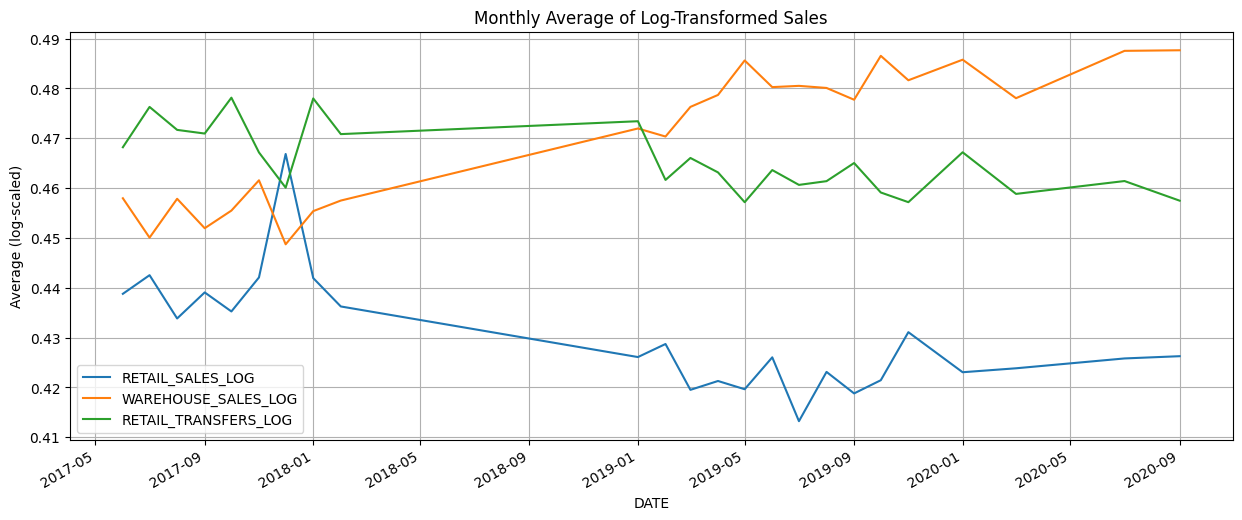

In [92]:
# Convert to datetime for trend analysis
df_lag_imputed['DATE'] = pd.to_datetime(df_lag_imputed['YEAR'].astype(str) + '-' + df_lag_imputed['MONTH'].astype(str) + '-01')

# Group by month and visualize trend
monthly_avg = df_lag_imputed.groupby('DATE')[['RETAIL_SALES_LOG', 'WAREHOUSE_SALES_LOG', 'RETAIL_TRANSFERS_LOG']].mean()

monthly_avg.plot(figsize=(15,6), title='Monthly Average of Log-Transformed Sales')
plt.ylabel('Average (log-scaled)')
plt.grid(True)
plt.show()


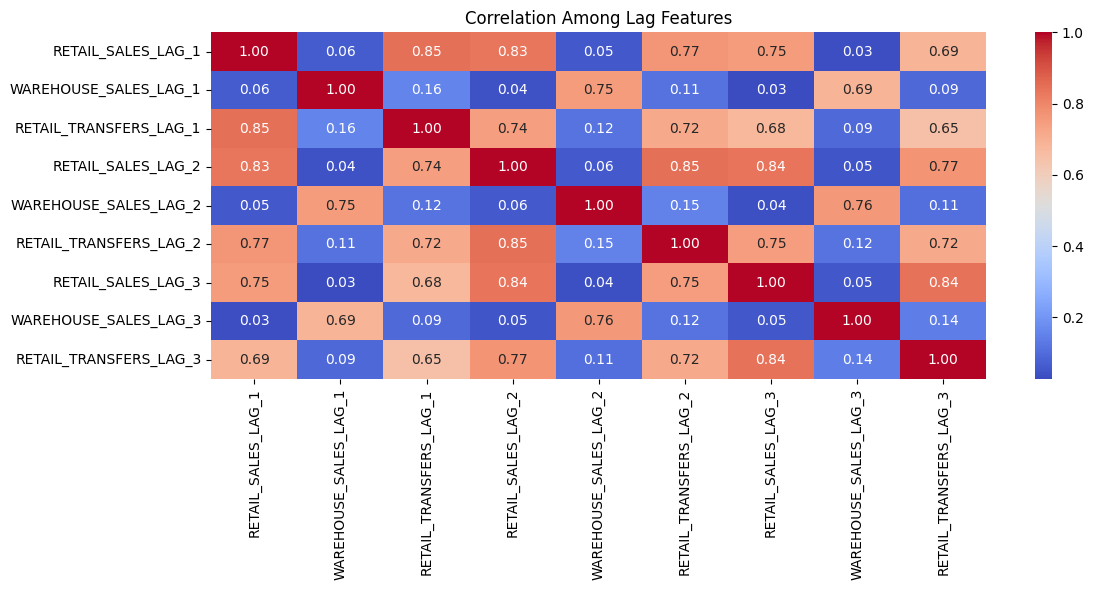

In [93]:
import seaborn as sns

lag_cols = [col for col in df_lag_imputed.columns if 'LAG' in col]
plt.figure(figsize=(12, 6))
sns.heatmap(df_lag_imputed[lag_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Among Lag Features')
plt.tight_layout()
plt.show()


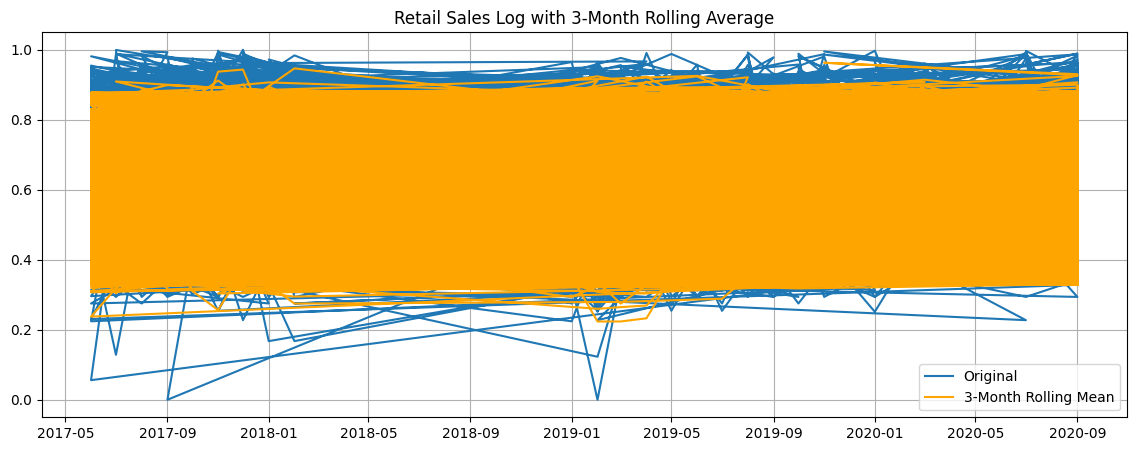

In [94]:
# Compute 3-month rolling mean for retail sales
df_lag_imputed['RETAIL_SALES_LOG_ROLL3'] = df_lag_imputed['RETAIL_SALES_LOG'].rolling(window=3).mean()


plt.figure(figsize=(14, 5))
plt.plot(df_lag_imputed['DATE'], df_lag_imputed['RETAIL_SALES_LOG'], label='Original')
plt.plot(df_lag_imputed['DATE'], df_lag_imputed['RETAIL_SALES_LOG_ROLL3'], label='3-Month Rolling Mean', color='orange')
plt.legend()
plt.title('Retail Sales Log with 3-Month Rolling Average')
plt.grid(True)
plt.show()


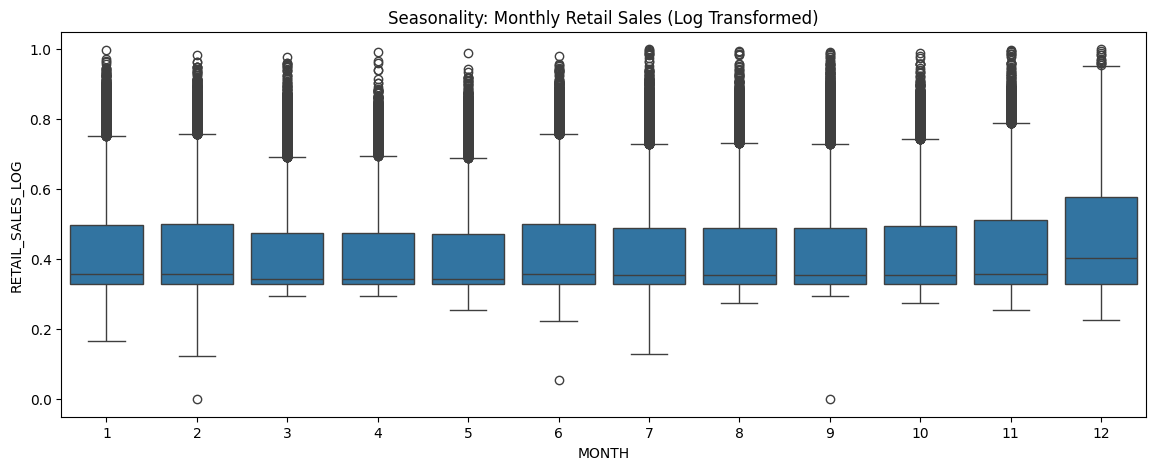

In [95]:
plt.figure(figsize=(14, 5))
sns.boxplot(x='MONTH', y='RETAIL_SALES_LOG', data=df_lag_imputed)
plt.title('Seasonality: Monthly Retail Sales (Log Transformed)')
plt.show()


In [96]:
# Create target for next month retail sales (log)
df_lag_imputed['RETAIL_SALES_LOG_TARGET'] = df_lag_imputed['RETAIL_SALES_LOG'].shift(-1)
df_model_final = df_lag_imputed.dropna(subset=['RETAIL_SALES_LOG_TARGET'])


df_model_final[['RETAIL_SALES_LOG', 'RETAIL_SALES_LOG_TARGET']].head()


,RETAIL_SALES_LOG,RETAIL_SALES_LOG_TARGET
48471,0.357513,0.328414
195005,0.328414,0.328414
207739,0.328414,0.328414
270378,0.328414,0.328414
283473,0.328414,0.328414


In [99]:
df_model_final.isnull().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,0
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL_SALES_LOG,0
WAREHOUSE_SALES_LOG,0
RETAIL_TRANSFERS_LOG,0
RETAIL_SALES_LAG_1,0


In [100]:
df_model_final['RETAIL_SALES_LOG_ROLL3'] = df_model_final['RETAIL_SALES_LOG_ROLL3'].fillna(method='bfill')


In [101]:
df_model_final

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL_SALES_LOG,WAREHOUSE_SALES_LOG,RETAIL_TRANSFERS_LOG,RETAIL_SALES_LAG_1,...,RETAIL_TRANSFERS_LAG_1,RETAIL_SALES_LAG_2,WAREHOUSE_SALES_LAG_2,RETAIL_TRANSFERS_LAG_2,RETAIL_SALES_LAG_3,WAREHOUSE_SALES_LAG_3,RETAIL_TRANSFERS_LAG_3,DATE,RETAIL_SALES_LOG_ROLL3,RETAIL_SALES_LOG_TARGET
48471,2017,7,270,0,23936,2,0.357513,0.305812,0.362382,0.328414,...,0.335479,0.328414,0.425438,0.335479,0.328577,0.425438,0.335479,2017-07-01,0.338114,0.328414
195005,2019,4,75,1,18367,6,0.328414,0.425438,0.362382,0.328414,...,0.335479,0.328414,0.425438,0.335479,0.328577,0.425438,0.335479,2019-04-01,0.338114,0.328414
207739,2019,5,75,1,18367,6,0.328414,0.425438,0.362382,0.328414,...,0.335479,0.328414,0.425438,0.335479,0.328577,0.425438,0.335479,2019-05-01,0.338114,0.328414
270378,2019,10,75,1,18367,6,0.328414,0.425438,0.362382,0.328414,...,0.335479,0.328414,0.425438,0.335479,0.328577,0.425438,0.335479,2019-10-01,0.328414,0.328414
283473,2019,11,75,1,18367,6,0.328414,0.425438,0.362382,0.328414,...,0.335479,0.328414,0.425438,0.335479,0.328577,0.425438,0.335479,2019-11-01,0.328414,0.328414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11984,2020,1,43,33191,26789,1,0.328414,0.980966,0.362382,0.328414,...,0.335479,0.328414,0.958904,0.335479,0.328577,0.909254,0.335479,2020-01-01,0.328414,0.328414
34717,2020,3,43,33191,26789,1,0.328414,0.813976,0.362382,0.328414,...,0.335479,0.328414,0.954936,0.335479,0.328577,0.958904,0.335479,2020-03-01,0.328414,0.853521
75097,2017,8,43,33192,26778,0,0.853521,0.892805,0.523331,0.328414,...,0.335479,0.328414,0.954936,0.335479,0.328577,0.958904,0.335479,2017-08-01,0.503450,0.328414
195003,2019,3,43,33192,26841,0,0.328414,0.615042,0.362382,0.853521,...,0.503219,0.328414,0.954936,0.335479,0.328577,0.958904,0.335479,2019-03-01,0.503450,0.560601


In [102]:
df_model_final.isnull().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,0
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL_SALES_LOG,0
WAREHOUSE_SALES_LOG,0
RETAIL_TRANSFERS_LOG,0
RETAIL_SALES_LAG_1,0


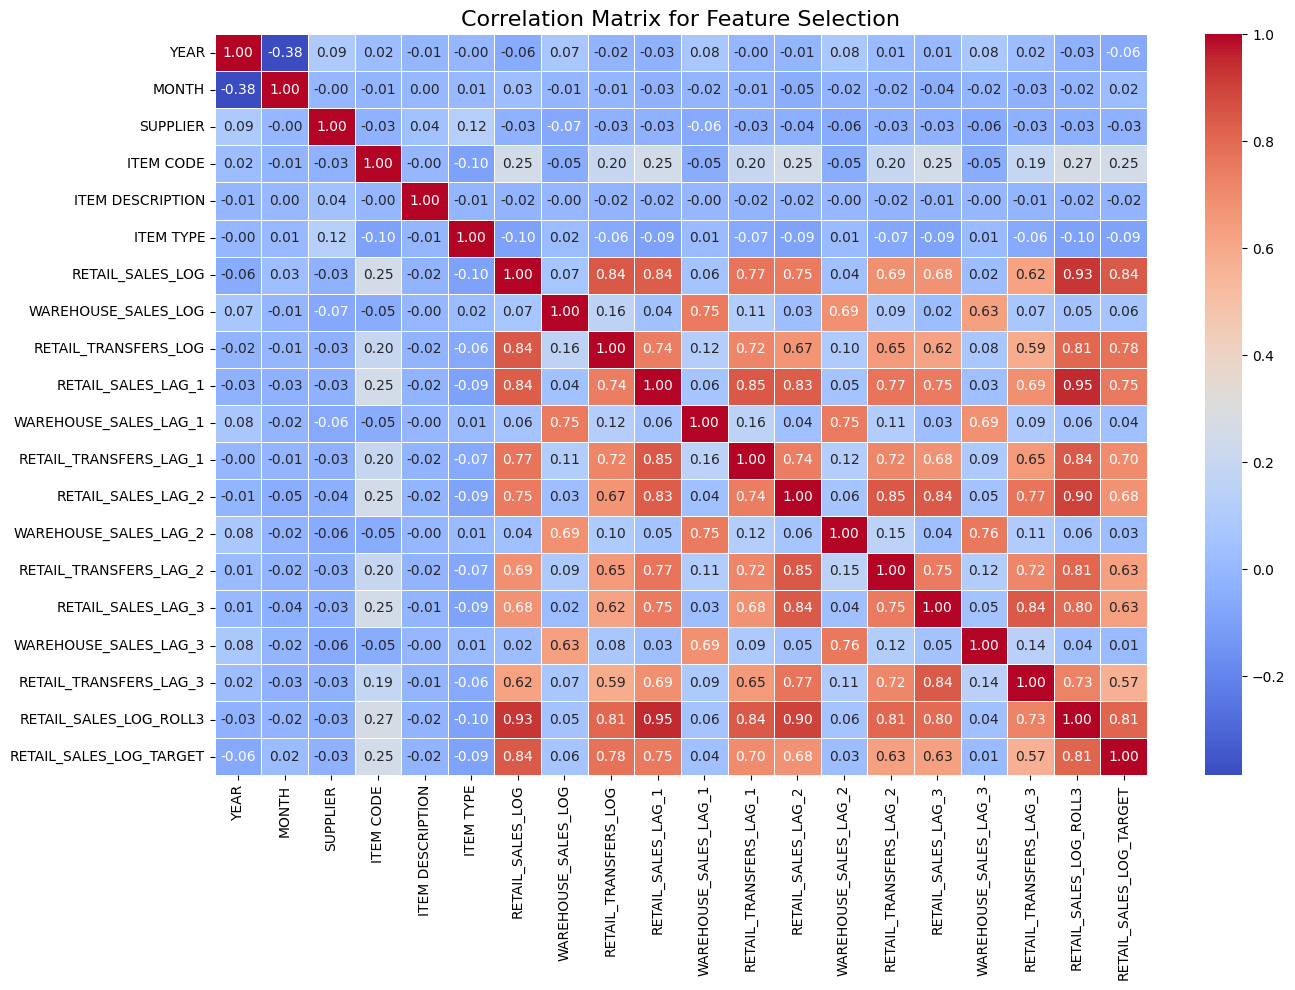

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns


corr_matrix = df_model_final.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix for Feature Selection", fontsize=16)
plt.tight_layout()
plt.show()


In [104]:
save_path = '/content/drive/MyDrive/retail_preprocessed.csv'

df.to_csv(save_path, index=False)
print(f"Data saved to: {save_path}")

Data saved to: /content/drive/MyDrive/retail_preprocessed.csv


**Milestone -3**

In [105]:
from scipy.stats import wasserstein_distance

In [107]:
num_cols = [col for col in df.select_dtypes(include=[np.number]).columns
            if df[col].nunique() > 10]

print("Filtered Numerical Columns (Continuous):", num_cols)


Filtered Numerical Columns (Continuous): ['MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION', 'RETAIL_SALES_LOG', 'WAREHOUSE_SALES_LOG', 'RETAIL_TRANSFERS_LOG', 'RETAIL_SALES_LAG_1', 'WAREHOUSE_SALES_LAG_1', 'RETAIL_TRANSFERS_LAG_1', 'RETAIL_SALES_LAG_2', 'WAREHOUSE_SALES_LAG_2', 'RETAIL_TRANSFERS_LAG_2', 'RETAIL_SALES_LAG_3', 'WAREHOUSE_SALES_LAG_3', 'RETAIL_TRANSFERS_LAG_3']


In [110]:
from scipy.stats import wasserstein_distance
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import copy

results = []
noisy_versions = {}
noise_std = 0.05  # Tune if needed

for col in num_cols:
    temp_df = df_model_final.copy()

    # Add Gaussian noise
    noise = np.random.normal(0, noise_std, size=temp_df[col].shape)
    temp_df[col] = temp_df[col] + noise

    # Store version
    noisy_versions[col] = temp_df.copy()

    # Evaluation metrics
    rmse = np.sqrt(mean_squared_error(df_model_final[col], temp_df[col]))
    mae = mean_absolute_error(df_model_final[col], temp_df[col])
    eu_dist = np.linalg.norm(df_model_final[col] - temp_df[col])
    wass_dist = wasserstein_distance(df_model_final[col], temp_df[col])

    results.append({
        'Column': col,
        'RMSE': rmse,
        'MAE': mae,
        'Euclidean_Distance': eu_dist,
        'Wasserstein_Distance': wass_dist
    })

results_df = pd.DataFrame(results).sort_values(by='Wasserstein_Distance', ascending=False)
results_df


,Column,RMSE,MAE,Euclidean_Distance,Wasserstein_Distance
0,MONTH,0.050118,0.039974,25.833469,0.039974
1,SUPPLIER,0.050045,0.039911,25.795434,0.039911
2,ITEM CODE,0.050028,0.039907,25.787149,0.039907
3,ITEM DESCRIPTION,0.049974,0.039860,25.759075,0.039860
9,RETAIL_TRANSFERS_LAG_1,0.049996,0.039865,25.770437,0.032469
6,RETAIL_TRANSFERS_LOG,0.050046,0.039885,25.796407,0.032297
12,RETAIL_TRANSFERS_LAG_2,0.049969,0.039870,25.756258,0.032278
15,RETAIL_TRANSFERS_LAG_3,0.049983,0.039878,25.763751,0.032120
5,WAREHOUSE_SALES_LOG,0.050015,0.039932,25.779943,0.022353
8,WAREHOUSE_SALES_LAG_1,0.050006,0.039876,25.775502,0.022119


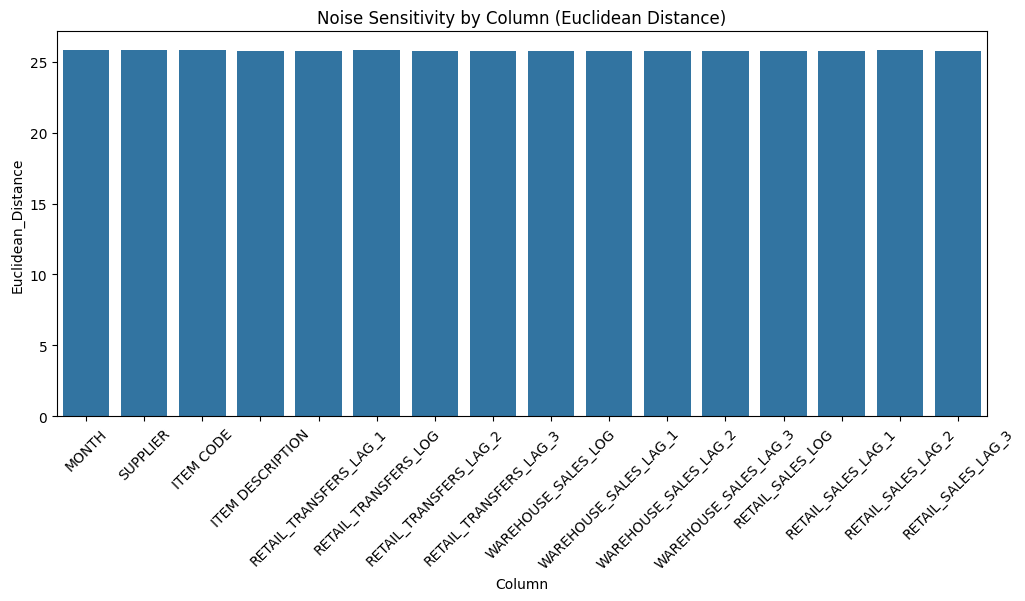

In [111]:
plt.figure(figsize=(12, 5))
sns.barplot(data=results_df, x='Column', y='Euclidean_Distance')
plt.xticks(rotation=45)
plt.title("Noise Sensitivity by Column (Euclidean Distance)")
plt.show()


['Column', 'RMSE', 'MAE', 'Euclidean_Distance', 'Wasserstein_Distance']


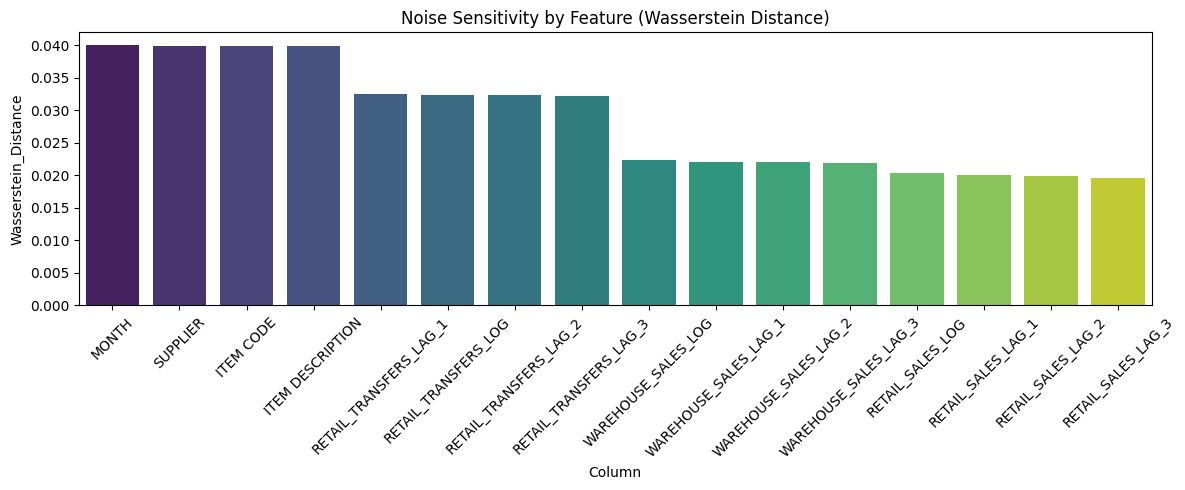

In [113]:
# Check actual column name (case sensitive!)
print(results_df.columns.tolist())

# Now fix the plotting code accordingly:
plt.figure(figsize=(12, 5))
sns.barplot(data=results_df.sort_values(by='Wasserstein_Distance', ascending=False),
            x='Column', y='Wasserstein_Distance', palette='viridis')
plt.title('Noise Sensitivity by Feature (Wasserstein Distance)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [116]:
from IPython.display import display

# Display noise impact table
display(results_df)

# Overall average impact
overall_score = results_df['Wasserstein_Distance'].mean()
print(" Overall Noise Impact Score:", round(overall_score, 5))


,Column,RMSE,MAE,Euclidean_Distance,Wasserstein_Distance
0,MONTH,0.050118,0.039974,25.833469,0.039974
1,SUPPLIER,0.050045,0.039911,25.795434,0.039911
2,ITEM CODE,0.050028,0.039907,25.787149,0.039907
3,ITEM DESCRIPTION,0.049974,0.039860,25.759075,0.039860
9,RETAIL_TRANSFERS_LAG_1,0.049996,0.039865,25.770437,0.032469
6,RETAIL_TRANSFERS_LOG,0.050046,0.039885,25.796407,0.032297
12,RETAIL_TRANSFERS_LAG_2,0.049969,0.039870,25.756258,0.032278
15,RETAIL_TRANSFERS_LAG_3,0.049983,0.039878,25.763751,0.032120
5,WAREHOUSE_SALES_LOG,0.050015,0.039932,25.779943,0.022353
8,WAREHOUSE_SALES_LAG_1,0.050006,0.039876,25.775502,0.022119


 Overall Noise Impact Score: 0.02857


In [119]:
# Top 5 most sensitive columns by noise
top_k = 5
top_columns = results_df.sort_values('Wasserstein_Distance', ascending=False)['Column'].head(top_k).tolist()
print("Top noise-sensitive columns:", top_columns)

Top noise-sensitive columns: ['MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION', 'RETAIL_TRANSFERS_LAG_1']


In [120]:
noisy_df = df_model_final.copy()

for col in num_cols:
    noise = np.random.normal(0, noise_std, size=noisy_df[col].shape)
    noisy_df[col] = noisy_df[col] + noise

In [121]:
noisy_df

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL_SALES_LOG,WAREHOUSE_SALES_LOG,RETAIL_TRANSFERS_LOG,RETAIL_SALES_LAG_1,...,RETAIL_TRANSFERS_LAG_1,RETAIL_SALES_LAG_2,WAREHOUSE_SALES_LAG_2,RETAIL_TRANSFERS_LAG_2,RETAIL_SALES_LAG_3,WAREHOUSE_SALES_LAG_3,RETAIL_TRANSFERS_LAG_3,DATE,RETAIL_SALES_LOG_ROLL3,RETAIL_SALES_LOG_TARGET
48471,2017,7.028483,270.045621,-0.055772,23935.975591,2,0.309533,0.264925,0.381439,0.289708,...,0.438668,0.337222,0.590837,0.331247,0.284935,0.408888,0.309707,2017-07-01,0.338114,0.328414
195005,2019,3.966349,74.984472,0.886767,18367.041246,6,0.310945,0.434444,0.427639,0.379362,...,0.371377,0.340927,0.465492,0.366666,0.347222,0.433263,0.255459,2019-04-01,0.338114,0.328414
207739,2019,4.981635,75.018681,0.998186,18367.030688,6,0.400084,0.366917,0.376449,0.364627,...,0.302075,0.300277,0.473611,0.268634,0.366550,0.399655,0.319115,2019-05-01,0.338114,0.328414
270378,2019,9.957370,74.983395,1.028492,18366.986651,6,0.283186,0.415338,0.347933,0.261238,...,0.349861,0.374301,0.506927,0.255254,0.387401,0.393133,0.248140,2019-10-01,0.328414,0.328414
283473,2019,11.036152,74.967017,0.967618,18366.957284,6,0.323419,0.420739,0.393685,0.293560,...,0.395529,0.347491,0.446622,0.379971,0.316174,0.430130,0.252636,2019-11-01,0.328414,0.328414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11984,2020,0.926570,42.980829,33191.082718,26789.028705,1,0.313748,0.944863,0.381556,0.249322,...,0.276580,0.377874,1.006830,0.318095,0.293386,0.883129,0.320221,2020-01-01,0.328414,0.328414
34717,2020,2.932588,43.098558,33190.976078,26789.006268,1,0.264165,0.860483,0.434197,0.336576,...,0.357565,0.399570,0.861268,0.368548,0.275653,1.003989,0.267156,2020-03-01,0.328414,0.853521
75097,2017,7.997429,42.934663,33191.985131,26778.009331,0,0.806861,0.822718,0.488339,0.330924,...,0.346721,0.411489,0.950865,0.329363,0.347743,0.940304,0.333545,2017-08-01,0.503450,0.328414
195003,2019,3.049089,42.883254,33191.962458,26841.011796,0,0.262564,0.611378,0.378520,0.859864,...,0.508638,0.289547,0.948833,0.311288,0.358518,1.068027,0.354777,2019-03-01,0.503450,0.560601


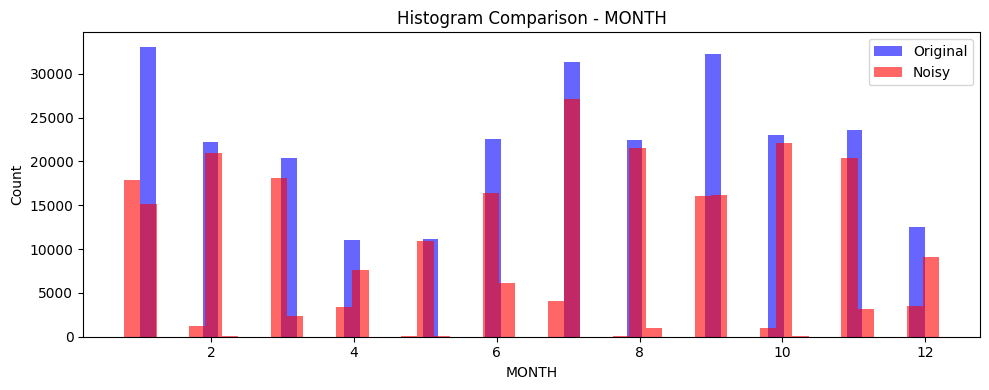

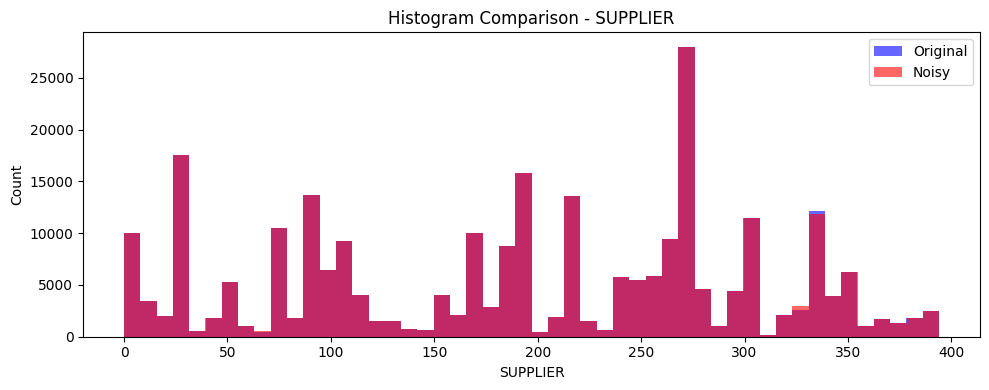

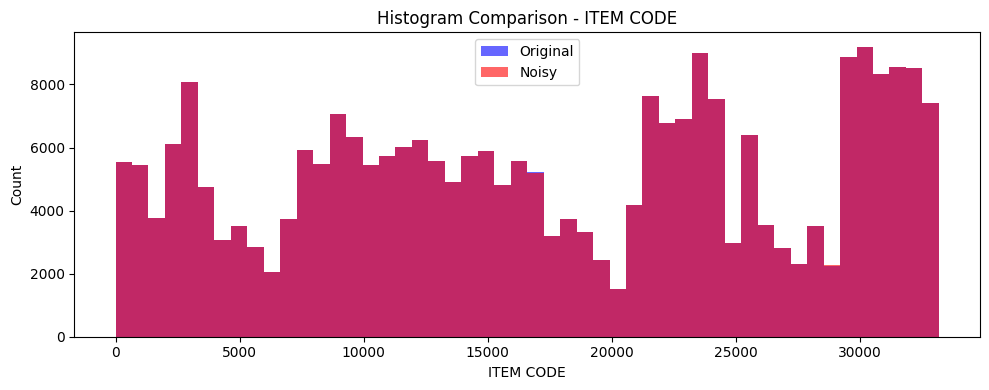

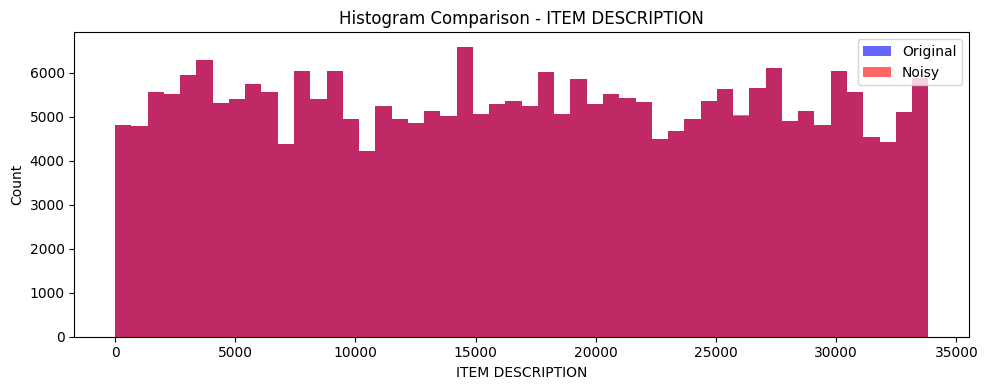

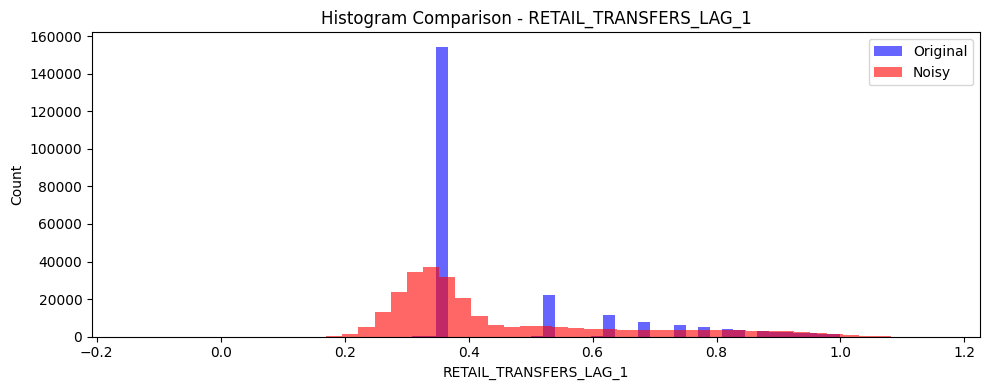

In [122]:
for col in top_columns:
    plt.figure(figsize=(10, 4))
    plt.hist(df[col], bins=50, alpha=0.6, label='Original', color='blue')
    plt.hist(noisy_df[col], bins=50, alpha=0.6, label='Noisy', color='red')
    plt.title(f'Histogram Comparison - {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()

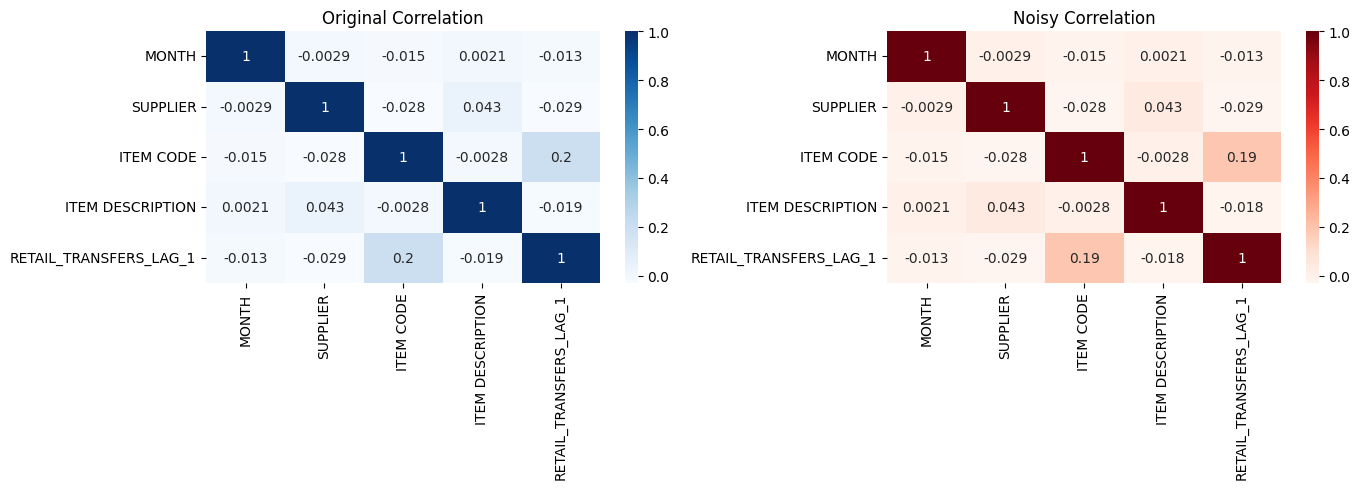

In [124]:
corr_original = df_model_final[top_columns].corr()
corr_noisy = noisy_df[top_columns].corr()

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(corr_original, annot=True, cmap='Blues', ax=axs[0])
axs[0].set_title("Original Correlation")

sns.heatmap(corr_noisy, annot=True, cmap='Reds', ax=axs[1])
axs[1].set_title("Noisy Correlation")
plt.tight_layout()
plt.show()


In [126]:
import numpy as np

def create_multistep_sequences(data, input_seq_len=12, forecast_horizon=6):
    X, y = [], []

    for i in range(len(data) - input_seq_len - forecast_horizon + 1):
        input_seq = data[i : i + input_seq_len]
        target_seq = data[i + input_seq_len : i + input_seq_len + forecast_horizon]
        X.append(input_seq)
        y.append(target_seq)

    return np.array(X), np.array(y)

In [127]:
feature_cols = df_model_final.select_dtypes(include=[np.number]).columns.tolist()
data_for_model = df_model_final[feature_cols].values

In [128]:
input_seq_len = 12  # past 12 months
forecast_horizon = 6  # predict next 6 months

X_seq, y_seq = create_multistep_sequences(data_for_model, input_seq_len, forecast_horizon)

print("Input shape (X):", X_seq.shape)
print("Output shape (y):", y_seq.shape)


Input shape (X): (265671, 12, 20)
Output shape (y): (265671, 6, 20)


In [129]:
# Define split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Total number of samples
total_samples = X_seq.shape[0]

# Calculate split indices
train_end = int(total_samples * train_ratio)
val_end = int(total_samples * (train_ratio + val_ratio))

# Perform split
X_train, y_train = X_seq[:train_end], y_seq[:train_end]
X_val, y_val = X_seq[train_end:val_end], y_seq[train_end:val_end]
X_test, y_test = X_seq[val_end:], y_seq[val_end:]

# Print shapes
print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Validation shape: {X_val.shape}, {y_val.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")

Train shape: (185969, 12, 20), (185969, 6, 20)
Validation shape: (39851, 12, 20), (39851, 6, 20)
Test shape: (39851, 12, 20), (39851, 6, 20)


In [131]:
from google.colab import drive
import pandas as pd
import numpy as np
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define save directory inside your Drive
save_dir = '/content/drive/MyDrive/retail_forecasting_sequences'
os.makedirs(save_dir, exist_ok=True)

# Function to flatten and save
def save_flattened_seq(X, y, name_prefix):
    # Flatten: (samples, timesteps, features) -> (samples, timesteps * features)
    X_flat = X.reshape(X.shape[0], -1)
    y_flat = y.reshape(y.shape[0], -1)

    # Convert to DataFrame
    X_df = pd.DataFrame(X_flat)
    y_df = pd.DataFrame(y_flat)

    # Save to Google Drive
    X_df.to_csv(f'{save_dir}/{name_prefix}_X.csv', index=False)
    y_df.to_csv(f'{save_dir}/{name_prefix}_y.csv', index=False)

# Save each split
save_flattened_seq(X_train, y_train, "train")
save_flattened_seq(X_val, y_val, "val")
save_flattened_seq(X_test, y_test, "test")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
def create_sequences(df, input_seq_len=12, output_seq_len=6):
    X_seq, y_seq = [], []
    for i in range(len(df) - input_seq_len - output_seq_len + 1):
        X_seq.append(df.iloc[i:i+input_seq_len].values)
        y_seq.append(df.iloc[i+input_seq_len:i+input_seq_len+output_seq_len].values)
    return np.array(X_seq), np.array(y_seq)

# Create sequences from noisy_df
X_seq_noisy, y_seq_noisy = create_sequences(noisy_df, input_seq_len=12, output_seq_len=6)


In [133]:
# Define split sizes
n_total = len(X_seq_noisy)
train_size = int(0.7 * n_total)
val_size = int(0.15 * n_total)

# Train / Val / Test Split
X_train_noisy = X_seq_noisy[:train_size]
y_train_noisy = y_seq_noisy[:train_size]

X_val_noisy = X_seq_noisy[train_size:train_size + val_size]
y_val_noisy = y_seq_noisy[train_size:train_size + val_size]

X_test_noisy = X_seq_noisy[train_size + val_size:]
y_test_noisy = y_seq_noisy[train_size + val_size:]


In [135]:
import pandas as pd
import os

# save directory
noisy_save_dir = '/content/drive/MyDrive/retail_forecasting_sequences_noisy'
os.makedirs(noisy_save_dir, exist_ok=True)

def save_flattened_noisy_seq(X, y, X_name, Y_name, save_path):
    X_flat = X.reshape(X.shape[0], -1)
    y_flat = y.reshape(y.shape[0], -1)

    X_df = pd.DataFrame(X_flat)
    y_df = pd.DataFrame(y_flat)

    X_df.to_csv(f'{save_path}/{X_name}.csv', index=False)
    y_df.to_csv(f'{save_path}/{Y_name}.csv', index=False)

# Save all noisy splits with specific variable-based file names
save_flattened_noisy_seq(X_train_noisy, y_train_noisy, "x_train_noisy", "y_train_noisy", noisy_save_dir)
save_flattened_noisy_seq(X_val_noisy, y_val_noisy, "x_val_noisy", "y_val_noisy", noisy_save_dir)
save_flattened_noisy_seq(X_test_noisy, y_test_noisy, "x_test_noisy", "y_test_noisy", noisy_save_dir)


In [136]:
print(f"Train shape: {X_train_noisy.shape}, {y_train_noisy.shape}")
print(f"Validation shape: {X_val_noisy.shape}, {y_val_noisy.shape}")
print(f"Test shape: {X_test_noisy.shape}, {y_test_noisy.shape}")

Train shape: (185969, 12, 21), (185969, 6, 21)
Validation shape: (39850, 12, 21), (39850, 6, 21)
Test shape: (39852, 12, 21), (39852, 6, 21)
